In [2]:
#importing liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [5]:
#importing and training in the minsom model
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

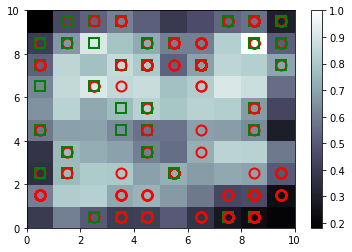

In [6]:
#vizualising the som graph 
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
#mapping and detecting the credit card frauds based on the highest weight and the highest probability
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(9,8)], mappings[(2,6)],axis = 0)
frauds = sc.inverse_transform(frauds)

In [8]:
#printing the frauds
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15631685
15753591
15587297
15682540
15797246
15800773
15614813
15701687
15571081
15751167
15778142
15802106
15812918
15715519
15630592
15711249
15784526
15589541
15757306
15700046
15598574
15587443
15711759
15665181
15808223
15744273
15773934
15805627
15757933
15583724
15810716
15585892
15609356
15588123
15583680
15572390
15575243
15690372
15566495
15631693
15586174
15646563
15652048
15613699
15667460
15569394
15594651


In [9]:
#Going from Unsupervised to Supervised Deep Learning

In [10]:
#Create Matrix of Features
customers = dataset.iloc[:, 1:].values

In [11]:
#Create Dependent Variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [12]:
#part 3 building the neural network nodel

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [14]:
#building the neural network model

In [15]:
#Import Tensorflow
import tensorflow as tf
tf.__version__

&#39;2.3.1&#39;

In [16]:
#Initializing the ANN
ann = tf.keras.models.Sequential()

In [17]:
#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [18]:
#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
#Training the ANN

In [20]:
#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
#Training the ANN on the Training set
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.8246
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.3598 - accuracy: 0.9319
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.9319
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9319
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.9319
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.9319
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2347 - accuracy: 0.9319
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2287 - accuracy: 0.9319
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2211 - accuracy: 0.9319
Epoch 10/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2122 - accuracy: 0.9319

&lt;tensorflow.python.keras.callbacks.History at 0x144241240&gt;

In [22]:
#Predicting test set results
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [30]:
#copying values to scale
new_list=y_pred.copy()


In [31]:
#printing and checking the new list 
new_list

array([[1.56514600e+07, 1.54495239e-04],
       [1.56546250e+07, 5.75244427e-04],
       [1.57672640e+07, 6.87390566e-04],
       ...,
       [1.57511670e+07, 3.14302176e-01],
       [1.57117590e+07, 3.29027712e-01],
       [1.56305920e+07, 3.41145575e-01]])

In [32]:
#storing the probabilities
x=[]
for i in new_list:
    x.append(i[1])

In [34]:
#finding the maximum value in the list
max_val=max(x)
print(max_val)

0.3411455750465393


In [35]:
#scaling the values to 1
scale_value=1/max_val
print(scale_value)

2.93129992925624


In [36]:
#scaling the values in the list from 0-1 for probabilities
for i in new_list:
    i[1]=i[1]*scale_value

In [38]:
#storing the values in the form of 
x=pd.DataFrame(new_list, columns =['credit_card_id', 'probability_of_fraud'])

In [40]:
#saving the excel file for further pro
x.to_excel("list_scale.xlsx")
ann.save('final.h5')

In [42]:
#saving the model
ann.save('final.h5')

In [41]:
###end of credit card fraud detection 

In [ ]:
"""
BY 
S A HARIPRASAD 18BCE0686
N KISHORE KUMAR 18BCE2106
"""